# **Mini Project Assignment -II**

Total Marks: 30

URL for Ecommerce Site:
https://www.flipkart.com/

1. Import Libraries (2 Marks)

In [1]:
# Standard library imports
import concurrent.futures
import os  # Operating system dependent functionality
import time  # Time-related functions
import warnings  # Suppressing warnings
import re  # Regular expression operations
import string  # Common string operations

# Data processing and analysis imports
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.feature_extraction.text import CountVectorizer  # Convert text to vector

# Natural Language Processing (NLP) imports
import nltk  # Natural language toolkit
from nltk.corpus import stopwords, wordnet  # Stopwords and wordnet corpus
from nltk.stem import WordNetLemmatizer  # Lemmatizing words
from nltk.tokenize import word_tokenize  # Tokenizing strings

# Neural network and deep learning imports
import tensorflow as tf  # Deep learning library
from tensorflow.keras.models import Sequential  # Linear stack of layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional  # Various neural network layers
from tensorflow.keras.preprocessing.text import Tokenizer  # Text tokenization utility
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding utility
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard  # Callback to stop training when a monitored metric has stopped improving
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Web scraping imports
import requests  # HTTP requests
from bs4 import BeautifulSoup  # HTML and XML parsing
from selenium import webdriver  # Browser automation
from selenium.webdriver.common.by import By  # Used to locate elements on a web page
from selenium.webdriver.chrome.options import Options  # Chrome webdriver options
from selenium.webdriver.chrome.service import Service  # Chrome browser service

# Utility imports
from pprint import pprint  # Pretty-printing data structures
from tqdm import tqdm  # Progress bar

# Suppressing warnings for cleaner output
warnings.simplefilter("ignore")

C:\Users\vssha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Use the above URL to scrape product links from product listing pages (3 Marks)

In [2]:
# Setting Chrome options for headless browsing
options = Options()
options.add_argument("--headless")
options.add_argument(
    "--disable-gpu"
)  # This option is often recommended for headless running
options.add_experimental_option("extensionLoadTimeout", 60000)
# Creating the Chrome WebDriver with the specified options
driver = webdriver.Chrome(options=options)

# Initializing a list to store the fetched product links
all_links = []

# Base URL for the search page on Flipkart (can be modified for different search queries)
base_url = "https://www.flipkart.com/search?q=laptop&page="

# Looping through the first 10 pages of the search results
for page in range(1, 21):
    # Constructing the URL for the current page by appending the page number
    url = base_url + str(page)

    # Opening the URL in the browser
    driver.get(url)

    # Waiting for a short period to ensure the page loads completely
    time.sleep(1)

    # Finding all product links on the page using CSS selector (modify selector as needed)
    product_links = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    # Extracting the 'href' attribute from each link element
    links = [link.get_attribute("href") for link in product_links]

    # Adding the fetched links from the current page to the all_links list
    all_links.extend(links)

# Closing the browser after fetching all links
driver.quit()

# Printing the total number of product links fetched
print(f"Total links fetched: {len(all_links)}")

# Processing each link to create a list of dictionaries containing product and review links
processed_links = [
    {
        "product_link": link.split("?")[0],  # Extracting the base product link
        "review_link": link.split("?")[0].replace(
            "/p/", "/product-reviews/"
        ),  # Creating a link to the product reviews
    }
    for link in all_links
]

Total links fetched: 480


In [3]:
# Pretty print processed links
pprint(processed_links[:5])

[{'product_link': 'https://www.flipkart.com/hp-celeron-dual-core-n4500-4-gb-128-gb-emmc-storage-chrome-os-15a-na0012tu-chromebook/p/itm7d20974c3dfce',
  'review_link': 'https://www.flipkart.com/hp-celeron-dual-core-n4500-4-gb-128-gb-emmc-storage-chrome-os-15a-na0012tu-chromebook/product-reviews/itm7d20974c3dfce'},
 {'product_link': 'https://www.flipkart.com/hp-intel-celeron-dual-core-n4500-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm4489ddf90925c',
  'review_link': 'https://www.flipkart.com/hp-intel-celeron-dual-core-n4500-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/product-reviews/itm4489ddf90925c'},
 {'product_link': 'https://www.flipkart.com/hp-2023-athlon-dual-core-3050u-8-gb-512-gb-ssd-windows-11-home-15s-ey1509au-thin-light-laptop/p/itm930fe4c90a2f8',
  'review_link': 'https://www.flipkart.com/hp-2023-athlon-dual-core-3050u-8-gb-512-gb-ssd-windows-11-home-15s-ey1509au-thin-light-laptop/product-reviews/itm930fe4c90a2f8'},
 {'product_link': 'https:/

3. Scraping of "laptop" data from individual product pages (5 Marks)

In [4]:
def scrape_data(link):
    with webdriver.Chrome(options=options) as driver:
        # Navigate to the product page
        driver.get(link["product_link"])
        time.sleep(2)  # Pause to allow the page to load, adjust timing as necessary

        # Retrieve and parse the HTML content of the product page
        html_content = driver.page_source
        soup = BeautifulSoup(html_content, "html.parser")

        # Extract the product title, use a default value if not found
        title = (
            soup.select_one("span.B_NuCI").get_text(strip=True)
            if soup.select_one("span.B_NuCI")
            else "N/A"
        )

        # Extract the product price, use a default value if not found
        price = (
            soup.select_one("div._30jeq3").get_text(strip=True)
            if soup.select_one("div._30jeq3")
            else "N/A"
        )

        # Extract the model name from the product details
        model_name_td = soup.find("td", text="Model Name")
        model_name = (
            model_name_td.find_next_sibling("td").text.strip()
            if model_name_td and model_name_td.find_next_sibling("td")
            else "N/A"
        )

        # Extract the product type from the product details
        type_td = soup.find("td", text="Type")
        type_info = (
            type_td.find_next_sibling("td").text.strip()
            if type_td and type_td.find_next_sibling("td")
            else "N/A"
        )

        # Extract the product's star rating, use a default value if not found
        star_rating = (
            soup.select_one("div._2d4LTz").get_text(strip=True)
            if soup.select_one("div._2d4LTz")
            else "N/A"
        )

        # Navigate to the review page for the product
        driver.get(link["review_link"])
        time.sleep(
            2
        )  # Pause to allow the review page to load, adjust timing as necessary

        # Retrieve and parse the HTML content of the review page
        review_html_content = driver.page_source
        review_soup = BeautifulSoup(review_html_content, "html.parser")

        # Extract product reviews
        reviews = []
        review_elements = review_soup.select(
            "div.t-ZTKy"
        )  # Selector for review container
        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            reviews.append(review_text)

        # Store the extracted product data including reviews
        return {
            "title": title,
            "price": price,
            "model": model_name,
            "type": type_info,
            "star_rating": star_rating,
            "reviews": reviews,
        }


# Initialize a list to store the fetched product data
product_data = []

# Using ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor(
    max_workers=12
) as executor:  # Adjust max_workers as needed
    # Map the function and links to the executor
    future_to_link = {
        executor.submit(scrape_data, link): link for link in processed_links
    }

    # Process the results as they are completed with a progress bar
    for future in tqdm(
        concurrent.futures.as_completed(future_to_link),
        total=len(processed_links),
        desc="Scraping Progress",
    ):
        product_data.append(future.result())

Scraping Progress: 100%|█████████████████████████████████████████████████████████████| 480/480 [20:17<00:00,  2.54s/it]


In [5]:
# Pretty print a sample of  product data
pprint(product_data[:2])

[{'model': 'N/A',
  'price': 'N/A',
  'reviews': [],
  'star_rating': 'N/A',
  'title': 'N/A',
  'type': 'N/A'},
 {'model': 'UM5401QA-KM541WS',
  'price': '₹57,990',
  'reviews': ['Zen book is a premium series of asus, this laptop provides an '
              'immersive experience and the audio is also pretty good, but '
              'tune in has to be done!Above average performance (not for '
              'gaming)Built quality is top notchThe Trump Card of the laptop '
              'is the display, you will get a chance to see the same display '
              "that is available in 1l and above TV'sSo this is a great laptop "
              'for entertainment and education purposes.READ MORE',
              'Excellent if you can get it around 50k. It would have been '
              "awesome if it had 2022 processor and DDR5 RAM but it's still "
              "very capable. Display is the best I've ever seen. Gets quite "
              'bright. Speakers are also preety good. Could be l

4. Construct csv file which includes following information and name it as product.CSV (5 Marks)
                  a. Product title
                  b. Price
                  c. Model
                  d. Star rating including comments

In [6]:
df = pd.DataFrame(product_data)
df = df.explode("reviews")
df.reset_index(drop=True, inplace=True)
df.sample(5)

,title,price,model,type,star_rating,reviews
398,MSI GF63 Core i7 11th Gen 11800H - (16 GB/1 TB...,"₹65,990",GF63 Thin 11UC-1294IN,Gaming Laptop,4.3,"best product, gtav at high and very high setti..."
1767,HP Celeron Dual Core N4500 - (4 GB/128 GB EMMC...,"₹27,490",15a- na0008TU,Chromebook,3.9,Hey everyoneAfter reading all reviews I have p...
2102,SAMSUNG Galaxy Book3 Core i5 13th Gen 1335U - ...,"₹79,990",N/A,Thin and Light Laptop,4.3,Display is not LED good. I use it for office w...
2509,Acer Predator (2023) Core i9 13th Gen 13900HX ...,"₹2,49,990",PH16-71,Gaming Laptop,N/A,NaN
1061,Lenovo IdeaPad 3 Intel Core i5 12th Gen 12450H...,"₹67,990",15IAH7,Gaming Laptop,4.3,"Worth for the price, does the job quite wellTh..."


In [7]:
# Output
df.to_csv("product.csv", index=False)

# Use  product.CSV as dataset and build the sentiment analysis model which will predict the positive/negative review based on the star rating.

# Data processing [5 marks]

Load the csv file

In [8]:
data = pd.read_csv("product.csv")

### Prepare the data

In [9]:
# Check for non-laptop data
set(data["type"])

{'2 in 1 Laptop',
 'Business Laptop',
 'Chromebook',
 'Gaming Laptop',
 'Laptop',
 'Notebook',
 'Thin and Light Laptop',
 nan}

In [10]:
# CVheck the records with null in type
data[data["type"].isnull()]

,title,price,model,type,star_rating,reviews
0,NaN,NaN,NaN,NaN,NaN,NaN
510,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,NaN,NaN,NaN,NaN,NaN
1510,NaN,NaN,NaN,NaN,NaN,NaN
1522,NaN,NaN,NaN,NaN,NaN,NaN
1631,NaN,NaN,NaN,NaN,NaN,NaN
1693,NaN,NaN,NaN,NaN,NaN,NaN
1764,NaN,NaN,NaN,NaN,NaN,NaN
2037,NaN,NaN,NaN,NaN,NaN,NaN
2161,NaN,NaN,NaN,NaN,NaN,NaN



<span style="color:red;font-size: 24px;">As you can see there is no data in these rows. So we can safely drop them</span>

In [11]:
data = data[~data["type"].isnull()]

In [12]:
data.sample(5)

,title,price,model,type,star_rating,reviews
738,DELL Inspiron 3520 Core i3 11th Gen 1115G4 - (...,"₹40,990",Inspiron 3520,Thin and Light Laptop,3.6,NaN
2173,Lenovo Ideapad Slim 3i Intel Core i5 11th Gen ...,"₹44,990",NaN,Thin and Light Laptop,4.3,It is good for online classes and for slightly...
2833,Lenovo ThinkBook 15 Ryzen 3 Hexa Core 5300U - ...,"₹37,999",TB15 G3 ACL,Thin and Light Laptop,4.3,bestREAD MORE
2338,ASUS Vivobook 16 (2023) Core i3 13th Gen 1315U...,"₹45,990",X1605VAB-MB322WS,Laptop,4.5,RAM should be increased.READ MORE
2259,DELL G15 Core i5 12th Gen 12500H - (8 GB/512 G...,"₹69,790",Dell G15 Gaming,Gaming Laptop,4.4,Nice productREAD MORE


### Perform an Text preprocessing tasks whichever is appropriate

In [13]:
# Replace "READ MORE" in reviews
data["reviews"] = data["reviews"].str.replace("READ MORE", "")

In [14]:
# Drop rows where there are no reviews
data = data[~data["reviews"].isnull()]
data = data[~data["star_rating"].isnull()]

In [15]:
# Convert star ratings to positive or negative sentiment
data['star_rating'] = data['star_rating'].astype(float)
data['sentiment'] = np.where(data['star_rating'] >= 3.5, 1, 0)

In [16]:
# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

# Initialize the lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    """
    Preprocess the text by performing several cleaning steps.
    """
    # Check if the text is a string
    if not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and symbols
    text = re.sub(r"[^\w\s]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove emojis
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Tokenization
    tokens = word_tokenize(text)
    # Punctuation mark removal and stop word removal
    tokens = [
        word
        for word in tokens
        if word not in string.punctuation and word not in stop_words
    ]
    # Lemmatization
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens
    ]
    return " ".join(lemmatized_tokens)


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV,
    }

    return tag_dict.get(tag, wordnet.NOUN)


# Applying the preprocessing function to the reviews column
data["cleaned_reviews"] = data["reviews"].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vssha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vssha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vssha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vssha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
data["cleaned_reviews"].sample(10)

1767    hey everyoneafter reading review purchase lapt...
2318    best laptop student enough office workhinge qu...
2108    true premium laptop speed performancelooks scr...
352     price point wing nuvobook laptop delivers exce...
262     excellent laptop great pricethe nm amd ryzen u...
3003    worth money spentgot day review sound output l...
375     overheat keypad also heating dont buy anyonean...
1479    great product great performanceonly con feel w...
2860                                        heating issue
300         good look good performance good battery bekup
Name: cleaned_reviews, dtype: object

### Separate the dependent and the independent variables.

In [18]:
# Independent variables (features)
X = data["cleaned_reviews"]

# Dependent variable (target)
y = data["sentiment"]

### Print the first ten records of data.

In [19]:
X.head(10)

1     zen book premium series asus laptop provide im...
2     excellent get around k would awesome processor...
3     goodi build quality absolutely phenomenal buil...
4                        product good bole paisa wasool
5     lovely productwould defenitely recommend inter...
6                display best laptop speaker could well
7     good simple great screen laptop look premium l...
8     great oled screen price range wont want look s...
9     get k absolutely beast price love oled panel t...
10    best laptop kspeaker issue solve use dts app p...
Name: cleaned_reviews, dtype: object

In [20]:
y.head(10)

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: sentiment, dtype: int32

In [ ]:
Y.unique

array([1, 0])

<AxesSubplot:>

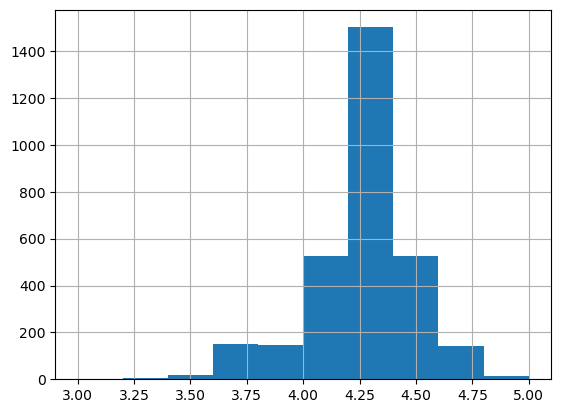

In [21]:
data['star_rating'].hist()

## Feature Extraction - Do count vectorizer and pad sequence use maximum features as 1000 [5 marks]

In [22]:
# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000)
X_vectorized = vectorizer.fit_transform(X)
# Pad sequences
maxlen = 100
X_padded = pad_sequences(X_vectorized.toarray(), maxlen=maxlen)

In [23]:
# Check if the number of samples in X and y match
print(f"Number of samples in X: {X_padded.shape[0]}")
print(f"Number of samples in y: {y.shape[0]}")

Number of samples in X: 3035
Number of samples in y: 3035


### Split the training and testing data

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.3, random_state=42,shuffle=True,stratify=y)

# Design a LSTM Model [5 marks]

In [25]:
# Design the LSTM model
model = Sequential()
model.add(Embedding(1000, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
optimizer = optimizers.Adam(lr=0.0008)  # Start with a higher learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.0000000000000000000000001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### print the model summary

In [26]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 226,945
Trainable params: 226,945
Non-trainable params: 0
_________________________________________________________________


### Train and validate the model

In [27]:
# Train the model with validation data
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=30, callbacks=[reduce_lr])

Epoch 1/50
71/71 [==============================] - 9s 61ms/step - loss: 0.0840 - accuracy: 0.9962 - val_loss: 0.0172 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - 4s 51ms/step - loss: 0.0208 - accuracy: 0.9972 - val_loss: 0.0159 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - 4s 52ms/step - loss: 0.0201 - accuracy: 0.9972 - val_loss: 0.0169 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - 4s 51ms/step - loss: 0.0196 - accuracy: 0.9972 - val_loss: 0.0157 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 5/50
71/71 [==============================] - 4s 52ms/step - loss: 0.0198 - accuracy: 0.9972 - val_loss: 0.0156 - val_accuracy: 0.9978 - lr: 2.0000e-04
Epoch 6/50
71/71 [==============================] - 4s 52ms/step - loss: 0.0197 - accuracy: 0.9972 - val_loss: 0.0156 - val_accuracy: 0.9978 - lr: 2.0000e-04
Epoch 7/50
71/71 [==============================] - 4s 52ms/step - l


Test the model with your own example.

In [28]:
set(y)

{0, 1}

In [72]:
text = 'This Laptop is bad buy for gaming. It lags when playing games that require high FPS and graphics. Though the battery is said to last 4 hours the real battery life is 2 hours'
tester = np.array([text])
tester = pd.DataFrame(tester)
tester.columns = ['text']
test = tester.apply(preprocess_text)
print(str(test))
#tester['text'] = tester['text'].apply(lambda x: x.lower())
#tester['text'] = tester['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

max_fatures = 20
#test = vectorizer.texts_to_sequences(tester['text'].values)


X_vectorized = vectorizer.fit_transform(tester['text'])
# Pad sequences
maxlen = 100
X_padded = pad_sequences(X_vectorized.toarray(), maxlen=maxlen)


print(X_test.shape[1])

if X_test.shape[1]>X_padded.shape[1]:
    test = np.pad(test[0], (X.shape[1]-test.shape[1],0), 'constant')

#test = np.array([test])

print(X_padded.shape[1])
prediction = model.predict(X_padded)
y_pred= prediction[0].argmax()

if(y_pred == 1 & y_pred >0):
    print('review value is positive:',y_pred)
elif(y_pred ==0):
    print('review value is negative:',y_pred)

text    
dtype: object
100
100
1/1 [==============================] - 0s 24ms/step
review value is negative: 0


In [86]:
text = 'excellent laptop great pricethe nm amd ryzen u'
tester = np.array([text])
tester = pd.DataFrame(tester)
tester.columns = ['text']
test = tester.apply(preprocess_text)
print(str(test))
#tester['text'] = tester['text'].apply(lambda x: x.lower())
#tester['text'] = tester['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

max_fatures = 20
#test = vectorizer.texts_to_sequences(tester['text'].values)


X_vectorized = vectorizer.fit_transform(tester['text'])
# Pad sequences
maxlen = 100
X_padded = pad_sequences(X_vectorized.toarray(), maxlen=maxlen)


print(X_test.shape[1])

if X_test.shape[1]>X_padded.shape[1]:
    test = np.pad(test[0], (X.shape[1]-test.shape[1],0), 'constant')

#test = np.array([test])

print(X_padded.shape[1])
prediction = model.predict(X_padded)
prediction.argmax()

#if(y_pred == 1 & y_pred >0):
    #print('review value is positive:',y_pred)
#elif(y_pred ==0):
    #print('review value is negative:',y_pred)

text    
dtype: object
100
100
1/1 [==============================] - 0s 22ms/step


0